# US Visa Prediction Project

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

**About**

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem statement.
* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### 2.1 Import Required Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

#### Summary of dataset

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Observation:
* In the no_of_employees column the minimum value is -26 which is not possible. Also looking the 5 point summary indicates presence of outliers in the column.
* The oldest company is established in year 1800 and newest companies around 2016. The difference in 25 percentile to 75th shows that most of the companies started between the years 1976 to 2005.
* The average wage is around 52K dollars with the highest pay being approximately 320K dollars.

##### Checking datatypes in dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Observation:
* There no null values in any of the column and most of the columns were of object datatype

## 3. Exploratory Data Analysis

In [3]:
# looking at categorical columns

cat_columns = df.select_dtypes(include="object").columns

for i in cat_columns:
    print(f"******************** {i} ******************* ")
    print(set(df[i]))
    print()

******************** case_id ******************* 
{'EZYV17705', 'EZYV22798', 'EZYV87', 'EZYV10050', 'EZYV12198', 'EZYV18051', 'EZYV16444', 'EZYV11722', 'EZYV10495', 'EZYV25084', 'EZYV14281', 'EZYV24744', 'EZYV23254', 'EZYV10130', 'EZYV8745', 'EZYV1675', 'EZYV21041', 'EZYV13115', 'EZYV7545', 'EZYV16632', 'EZYV19690', 'EZYV9531', 'EZYV14414', 'EZYV21648', 'EZYV6821', 'EZYV9487', 'EZYV17413', 'EZYV2477', 'EZYV3618', 'EZYV22151', 'EZYV3022', 'EZYV20505', 'EZYV4823', 'EZYV209', 'EZYV3272', 'EZYV4700', 'EZYV18812', 'EZYV8740', 'EZYV922', 'EZYV15351', 'EZYV21813', 'EZYV6047', 'EZYV24826', 'EZYV3214', 'EZYV11751', 'EZYV5544', 'EZYV2036', 'EZYV7333', 'EZYV15634', 'EZYV442', 'EZYV11008', 'EZYV18711', 'EZYV9993', 'EZYV6651', 'EZYV21624', 'EZYV103', 'EZYV16908', 'EZYV21329', 'EZYV8525', 'EZYV3748', 'EZYV804', 'EZYV14386', 'EZYV10221', 'EZYV1148', 'EZYV21353', 'EZYV12243', 'EZYV7628', 'EZYV2209', 'EZYV17834', 'EZYV24196', 'EZYV25066', 'EZYV15654', 'EZYV3581', 'EZYV22530', 'EZYV25010', 'EZYV2426', '

Observation:
* There aren't any invalid values in the categorical columns

In [4]:
# looking at numerical columns

num_columns = df.select_dtypes(exclude="object").columns

for i in num_columns:
    print(f"******************** {i} ******************* ")
    print(sorted(set(df[i])))
    print()

******************** no_of_employees ******************* 
[-26, -25, -17, -14, -11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

Observation:
* There are few outiers in no_of_employees column as there can't be negative number of people working in an organisation. And also on prevailing_wage as the wages are too low.

In [5]:
df = df.drop(columns=['case_id'])

In [6]:
#proportion of count of data in categorical columns

cat_columns = df.select_dtypes(include="object").columns

for i in cat_columns:
    print(f"******************** {i} ******************* ")
    print(df[i].value_counts(normalize=True)*100)
    print()


******************** continent ******************* 
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

******************** education_of_employee ******************* 
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

******************** has_job_experience ******************* 
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

******************** requires_job_training ******************* 
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

******************** region_of_employment ******************* 
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: floa

Observations:
* The data is highly biased towards Asia.
* Most of the wages are done Yearly, there are also wages paid monthly, weekly and hourly this helps to justify the low wages in prevailing_wage column as hourly wages can be low.
* Around 90% of the apllicants work full time.

## Univariate Analysis

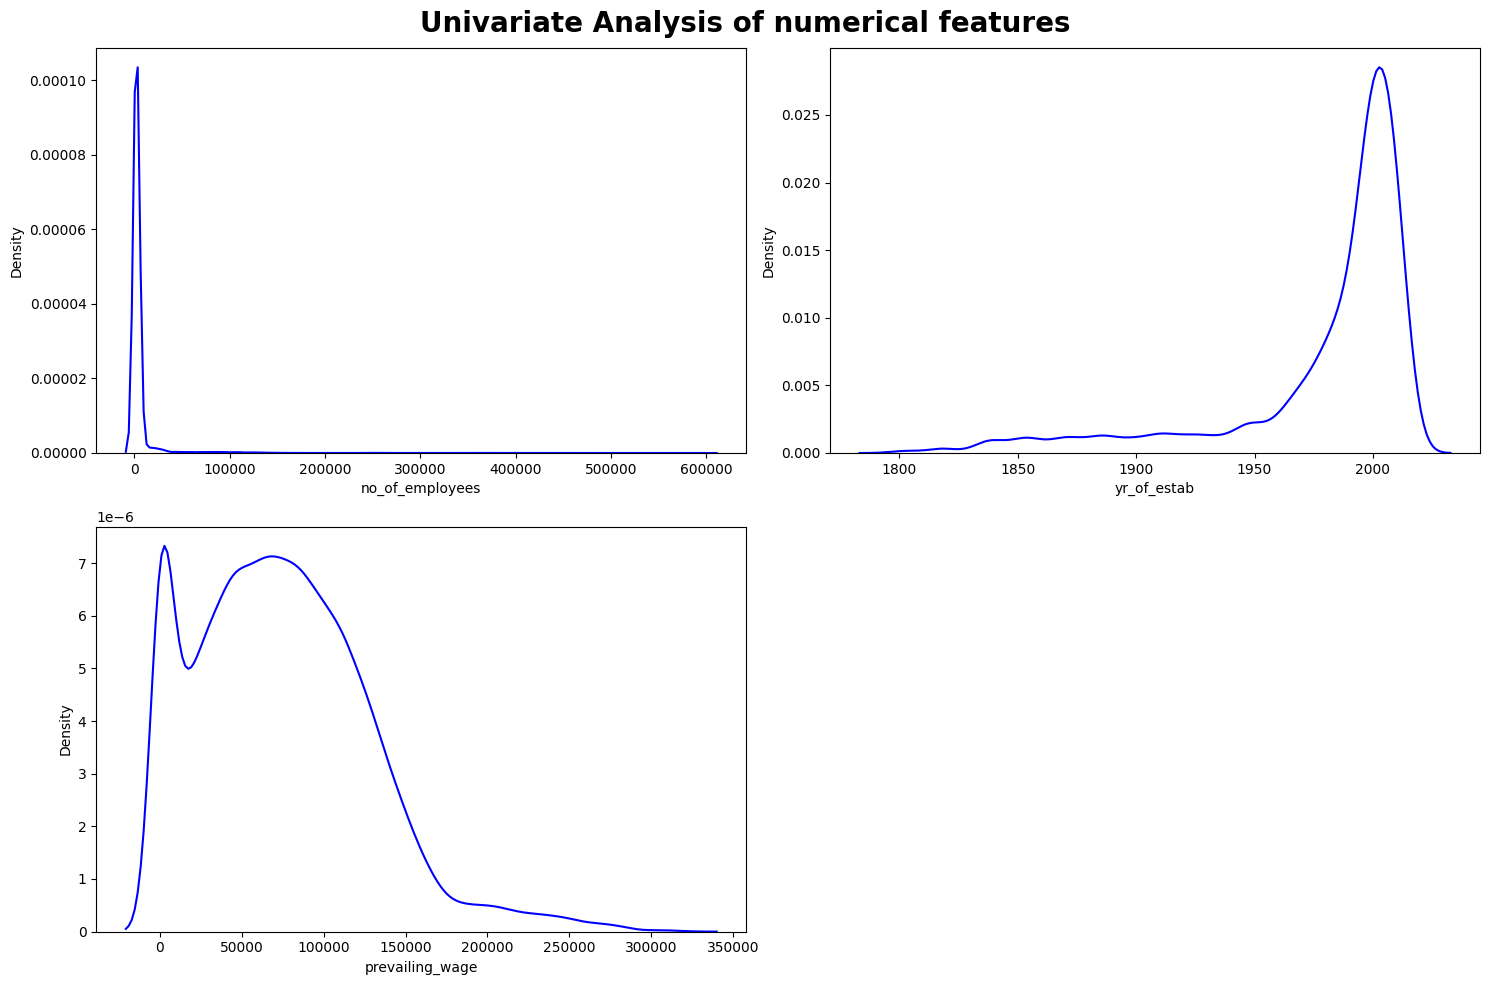

In [29]:
plt.figure(figsize = (15,10))
plt.suptitle("Univariate Analysis of numerical features", fontweight='bold', fontsize = 20)

num_features = df.select_dtypes(exclude='object').columns

for i in range(0,len(num_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_features[i]], color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()

Observation:
* no_of_employees column looks more skewed but it may be because of outlies.
* yr_of_estab is a discrete feature.
* privailing-wage is a right-skewed distribution.

### Categorical features

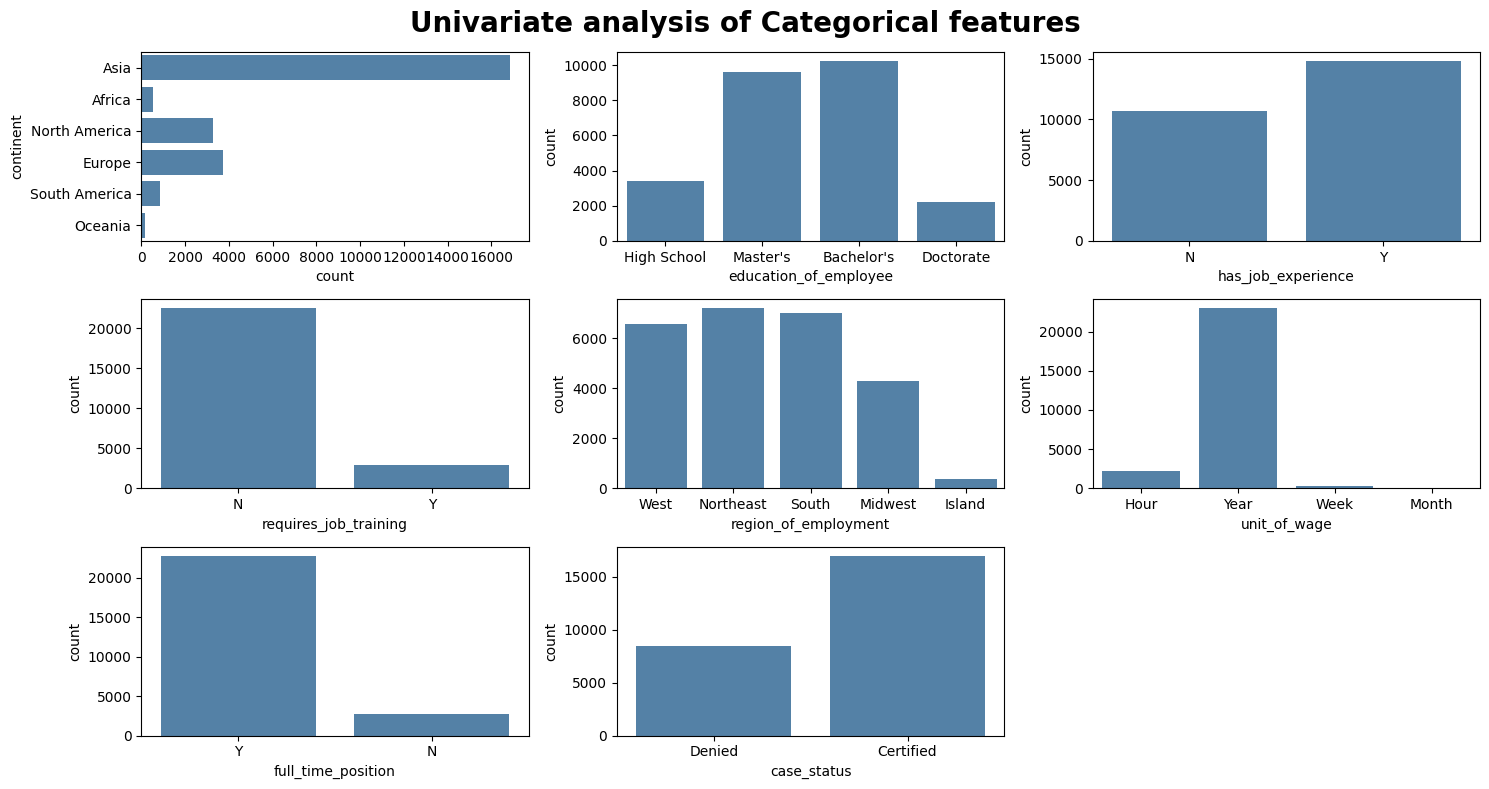

In [44]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate analysis of Categorical features', fontsize=20, fontweight='bold')

for i in range(0, len(cat_columns)):
    plt.subplot(3,3,i+1)
    if cat_columns[i] == 'continent':
        sns.countplot(df[cat_columns[i]], color='SteelBlue')
    else:
        sns.countplot(x = df[cat_columns[i]], color='SteelBlue')
        plt.xlabel(cat_columns[i])
    plt.tight_layout()

Observations:
* requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.
* In rest of the columns are balanced.

In [8]:
cat_columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

### Multivariate Analysis

#### Check for Multicollinearity in Numerical features

<Axes: >

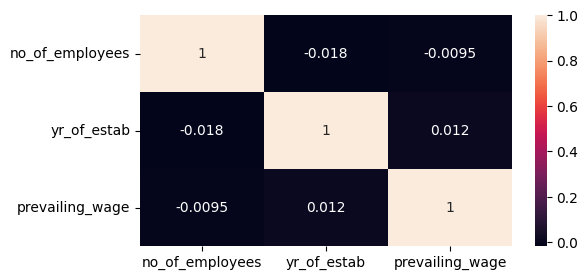

In [56]:

plt.figure(figsize = (6,3))
sns.heatmap(df[num_features].corr(),annot=True)

Observation:
* There is no multicollinearity between the numerical features.

#### MultiCollinearity in Categorical features

* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e case_status

* Null Hypothesis: The feature is independent of target column (No-Correlation)
* Alternate Hypothesis: The feature and target column are not independent (Correlated)

In [64]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_columns:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_columns,chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


Report:
* Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

C:\Users\nitin\AppData\Local\Temp\ipykernel_4704\496397356.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nitin\AppData\Local\Temp\ipykernel_4704\496397356.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nitin\AppData\Local\Temp\ipykernel_4704\496397356.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




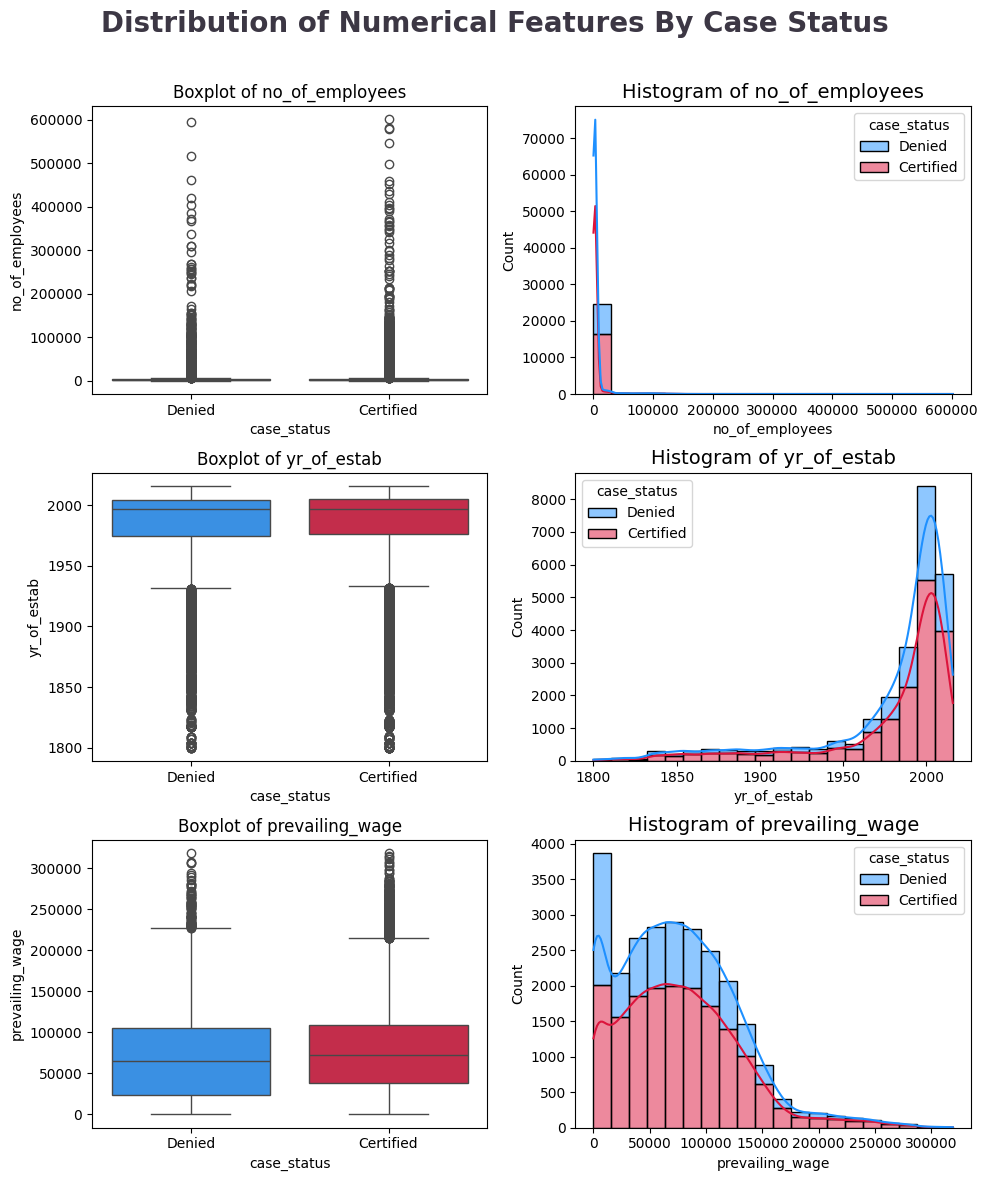

In [67]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(num_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

### Initial Analysis Report
* No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
* yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
* prevailing_wage is right skewed with outliers above upper bound of box plot.
* There are No missing values in the dataset.
* The case_id column can be deleted because each row has unique values.
* The case_status column is the target to predict.
* In the Categorical column, features can be made Binary numerical in feature Encoding

## 4. Visualization
 
#### 4.1 Visualize the target feature

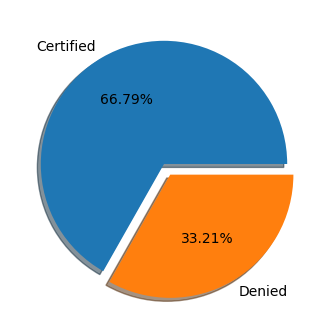

In [74]:
percentage = df['case_status'].value_counts(normalize = True)*100
labels = ['Certified','Denied']
plt.figure(figsize=(4,4))
plt.pie(percentage, labels=labels, explode = (0,0.1), autopct='%1.2f%%',shadow = True)
plt.show()

From the chart we can see that the target variable is imbalanced. i.e it has uneven distribution of observations

In [75]:
cat_columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### 4.2 Impact of candidate continent on visa status

In [12]:
df.groupby(['continent'])['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

C:\Users\nitin\AppData\Local\Temp\ipykernel_14156\764923433.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


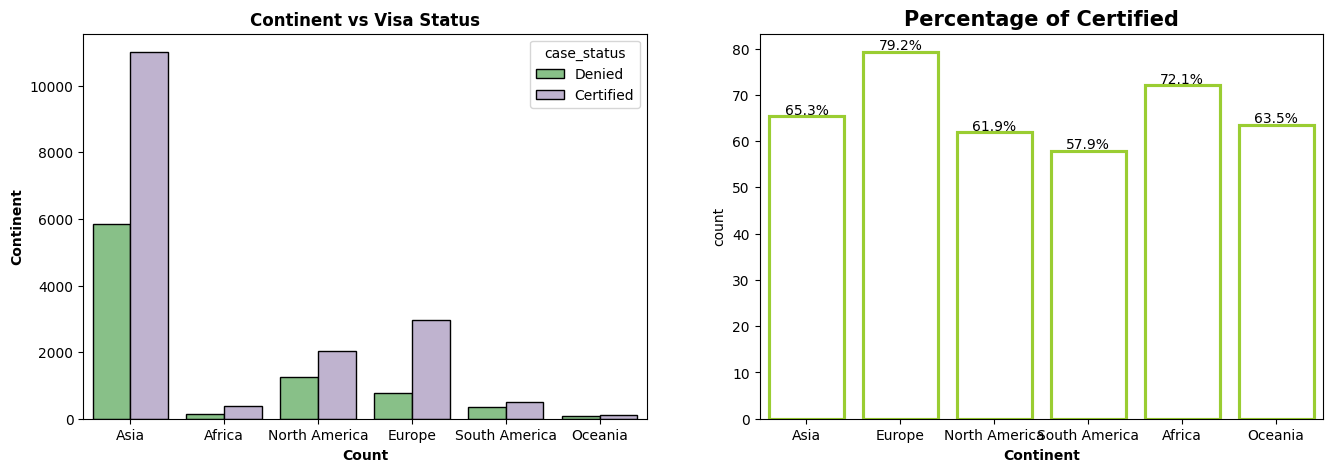

In [39]:
plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x="continent", ec = "black", hue='case_status', palette = 'Accent')
plt.title("Continent vs Visa Status", fontweight='bold')
plt.xlabel('Count',fontweight='bold')
plt.ylabel('Continent',fontweight='bold')


# percentage of certified
plt.subplot(1,2,2)
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
df2 = (df[df['case_status']=="Certified"]['continent'].value_counts()/df['continent'].value_counts()*100).reset_index()
sns.barplot(data= df2, x='continent', y='count', color='yellowgreen', fill=False)
order1 = (100*df[df["case_status"].isin(['Certified'])]['continent'].value_counts()/df['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.5,strt,ha='center')
plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


Observation:
* Europe has the highest certified percentage out of all continents followed by Africa. It has to be noticed that Africa's application count is lower though the percentage certified is high.
* Though Asia has higher number of applicants the certified percentage is lower than Europe and Africa.

In [33]:
cat_columns


Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### 4.3 Is there any impact of education of employee on case_status?

In [55]:
(df.groupby('education_of_employee')['case_status'].value_counts()).to_frame()

count
education_of_employee case_status       
Bachelor's            Certified     6367
                      Denied        3867
Doctorate             Certified     1912
                      Denied         280
High School           Denied        2256
                      Certified     1164
Master's              Certified     7575
                      Denied        2059

Text(0.5, 0, 'Education of Employee')

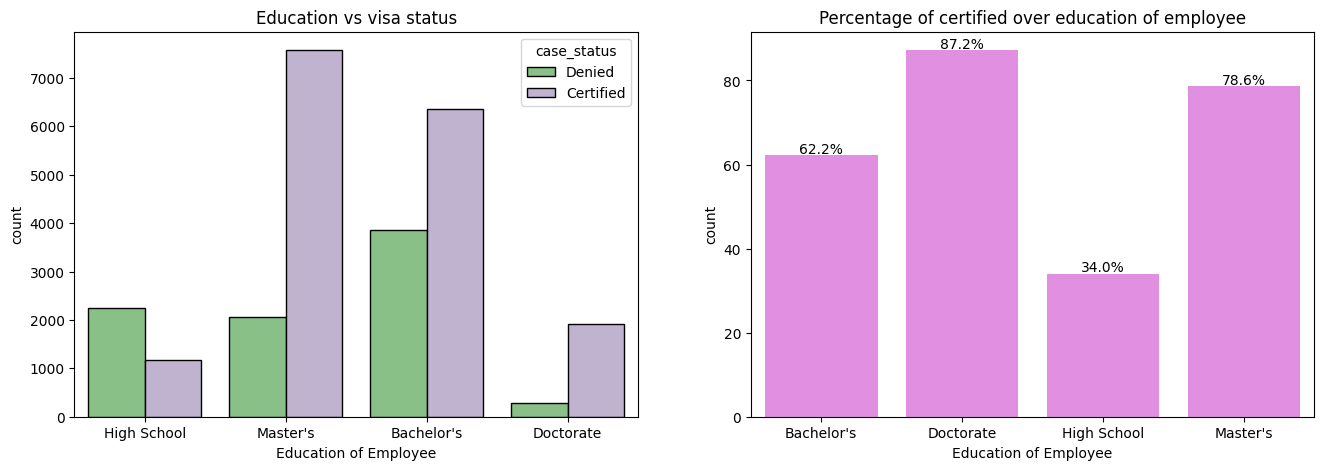

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Education vs visa status')
sns.countplot(data = df , x = 'education_of_employee', hue='case_status', ec='black', palette = 'Accent' )
plt.xlabel('Education of Employee')

plt.subplot(122)
plt.title('Percentage of certified over education of employee')
df2 = (df[df['case_status']=='Certified']['education_of_employee'].value_counts()/df['education_of_employee'].value_counts()*100).reset_index()
sns.barplot(data = df2 , x='education_of_employee', y='count', color ='violet')
order = df[df['case_status']=='Certified']['education_of_employee'].value_counts()/df['education_of_employee'].value_counts()*100
for i in range(order.shape[0]):
    count = order[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count+0.5,strt, ha='center')
plt.xlabel('Education of Employee')

Observation:
* A large number of master's degree holders are applying for visa in US followed by bachelor's candidates.
* Doctorate holders have the highest certified percentage of around 87.2%. Doctorates are highly likely to get their visa certified.
* It's unlikely to get certified is the education is only high school as there is a chance of only over 34%